## Brief GGPLOT Tutorial

N=1,144 participants were contacted. Most respondents were contacted by email, a smaller sample was contacted by phone. The phone interviews did not come with gender and age. 

This notebook briefly explains a few examples -- ggplot is a flexible tool. There are many, many plots one could generate. 


In [96]:
library(dplyr)
library(survey)  
library(mice) 
library(reshape2)
rm(list=ls())
load("~/Desktop/APL Survey/cleaned_data.rda")
ls()

[1] "clean_data"

## Some predictions, a simulation, and a joy plot


In [97]:
clean_data$no_mask<-recode(clean_data$wear_mask, `1`=1, `2`=1, `3`=0, `4`=0, `5`=0)
print("Unweighted distribution of non-mask:")
table(clean_data$no_mask)
print("Logit Model")
glm(no_mask~as.factor(pid3), clean_data, family=binomial("logit")) %>% summary()
##Let's predict the probality for Dems, Reps, and Independents.
model<-glm(no_mask~pid, clean_data, family=binomial("logit"))

## Generate a matrix for your IV. Here is Dem - I'm multiplying the coefficient matrix
## by a 1,0,0 vector. Why, there are 3 parameters in the model, can't multiply the vectors
## if they are a different size
print("Predictions, Democrat, Independent, Republican")
coef(model) %*% c(1, 0, 0) ### Pr(non wearer|Dem)
coef(model) %*% c(1, 1, 0) ### Pr(non wearer|Ind)
coef(model) %*% c(1, 0, 1) ### Pr(non wearer|Rep)



[1] "Unweighted distribution of non-mask:"



   0    1 
1071   73 

[1] "Logit Model"



Call:
glm(formula = no_mask ~ as.factor(pid3), family = binomial("logit"), 
    data = clean_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.4616  -0.4616  -0.3760  -0.1420   3.0337  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)                 -4.5917     0.5803  -7.913 2.51e-15 ***
as.factor(pid3)Independent   1.9775     0.6085   3.250  0.00115 ** 
as.factor(pid3)Republican    2.4063     0.6050   3.978 6.96e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 543.01  on 1143  degrees of freedom
Residual deviance: 513.39  on 1141  degrees of freedom
AIC: 519.39

Number of Fisher Scoring iterations: 7


[1] "Predictions, Democrat, Independent, Republican"


ERROR: Error in coef(model) %*% c(1, 0, 0): non-conformable arguments



Call:
glm(formula = no_mask ~ rep_ft, family = binomial("logit"), data = clean_data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5382  -0.4380  -0.3260  -0.2313   2.6960  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.607488   0.261014 -13.821  < 2e-16 ***
rep_ft       0.017486   0.003743   4.672 2.99e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 543.01  on 1143  degrees of freedom
Residual deviance: 518.82  on 1142  degrees of freedom
AIC: 522.82

Number of Fisher Scoring iterations: 6


[1] "x" "y"

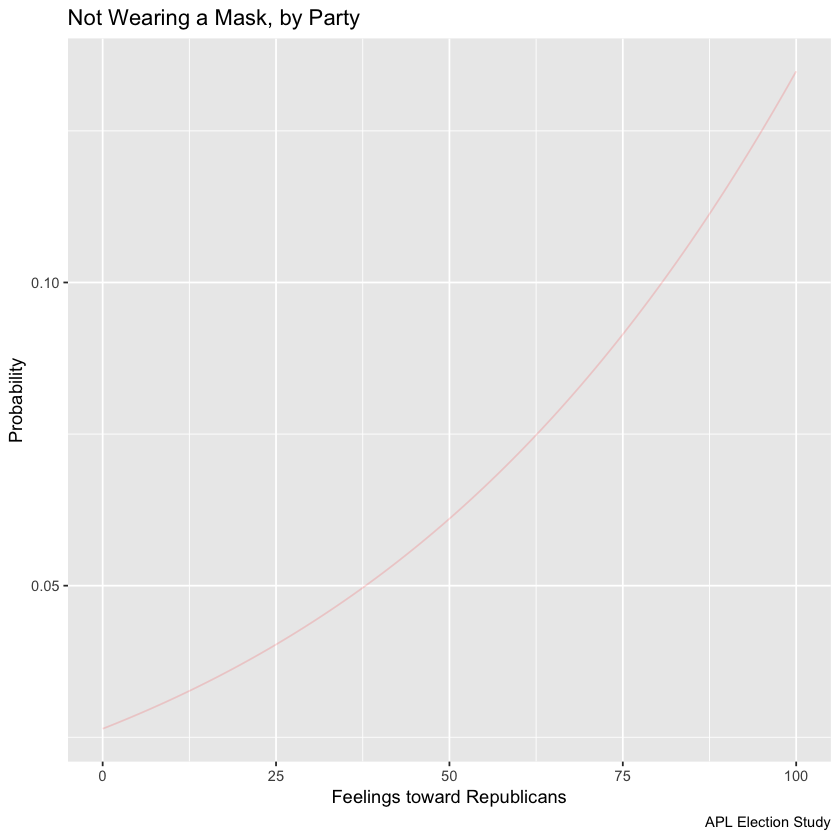

In [98]:
### Another way
model<-glm(no_mask~rep_ft, clean_data, family=binomial("logit"))
summary(model)
nd=data.frame(rep_ft=seq(from=0,to=100,by=1))
pred=predict(model, nd ) %>% plogis()
plot.data<-data.frame(x=nd[,1],y=pred)
names(plot.data)
library(ggplot2)
ggplot(plot.data, aes(x=x, y=y))+
       geom_line(colour="red", alpha=0.15)+
  labs(title="Not Wearing a Mask, by Party",
       caption="APL Election Study")+
   xlab("Feelings toward Republicans")+
   ylab("Probability")








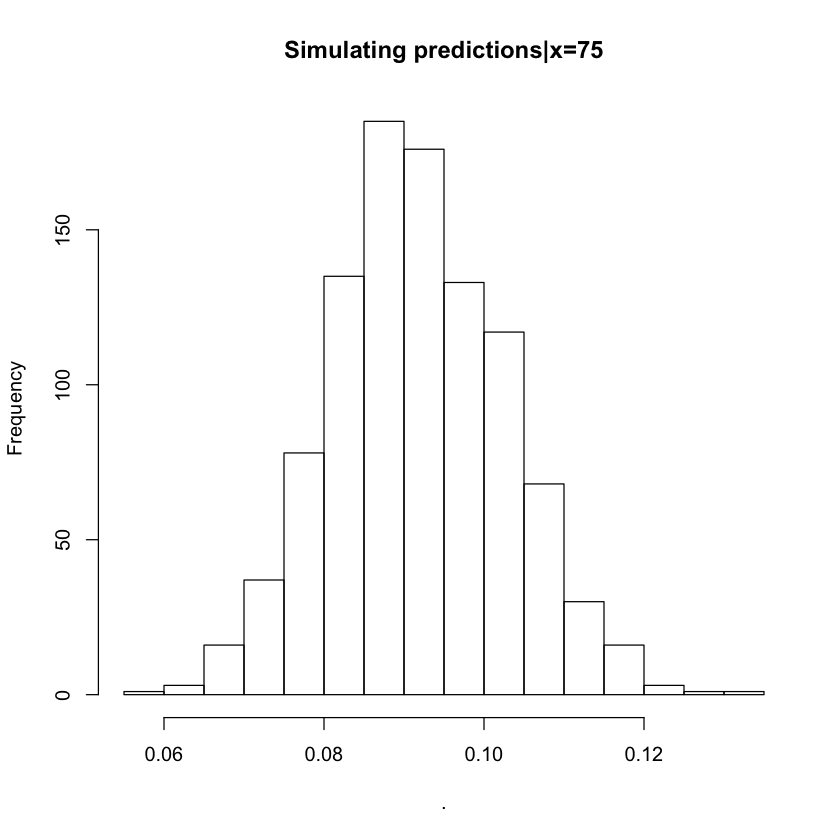

In [100]:
library(MASS)
sim_beta<-mvrnorm(1000, coef(model), vcov(model))
pred=sim_beta %*% c(1,75) %>% plogis() %>% hist(main="Simulating predictions|x=75")

#quantile(pred, prob=0.025)
#quantile(pred, prob=0.5)
#quantile(pred, prob=0.975)



In [51]:
coef(model) %*% c(1,0) %>% plogis() ## Probability of 1 at min x
1-coef(model) %*% c(1,0) %>% plogis() ## Probability of 1 at min x
## Odds of a 1|x=0
coef(model) %*% c(1,50) %>% plogis()/(1-coef(model) %*% c(1,50) %>% plogis() )
coef(model) %*% c(1,51) %>% plogis()/(1-coef(model) %*% c(1,51) %>% plogis() )
print("For every unit change in ")
coef(model )%>% exp()  
# Remember a coefficient is Change in y/change in x -- so if DV is in log odds, then b represents
# change in log odds for every unit change in x. Exponentiate and we can interpret b as change in odds.
(coef(model) %*% c(1,51) %>% plogis()/(1-coef(model) %*% c(1,51) %>% plogis() ))/
(coef(model) %*% c(1,50) %>% plogis()/(1-coef(model) %*% c(1,50) %>% plogis() ))
## It's constant, never changing in odds
(coef(model) %*% c(1,75) %>% plogis()/(1-coef(model) %*% c(1,75) %>% plogis() ))/
(coef(model) %*% c(1,74) %>% plogis()/(1-coef(model) %*% c(1,74) %>% plogis() ))


0.02640383


0.9735962


0.06501045


0.0661572


[1] "For every unit change in "


(Intercept)      rep_ft 
  0.0271199   1.0176394

1.017639


1.017639


## The Joy Plot

In [101]:
library(ggplot2)
library(ggridges)
post_dat$id<-seq(1:nrow(post_dat))
head(post_dat)

  mean(post_dat[,1])
mean(post_dat[,2])
mean(post_dat[,3])
plot_dat<-post_dat %>% melt(id="id")
head(plot_dat)
# Joy Plot:
ggplot(data=plot_dat, aes(y=as.factor(variable),
                          x=value, fill=as.factor(variable))) +
  geom_density_ridges(alpha=0.25) +
  scale_fill_manual(name="Party", values=c("blue", "purple", "red"))+
  labs(title="Not Wearing a Mask, by Party",
       caption="APL Election Study")+
   xlab("Probability")+
   ylab("Party ID")



ERROR: Error in nrow(post_dat): object 'post_dat' not found


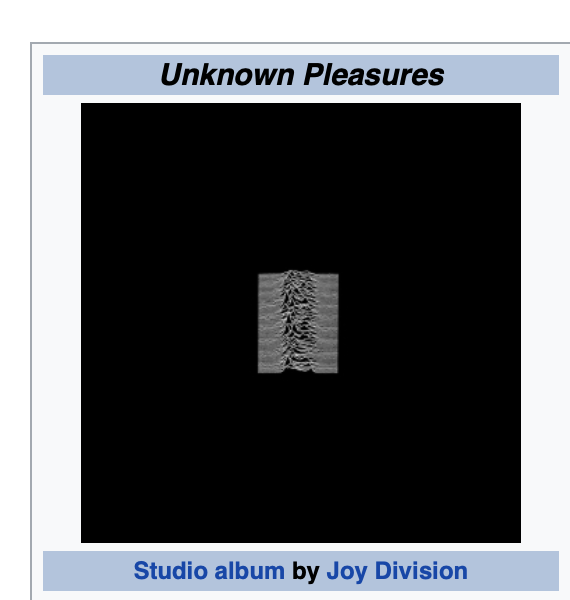

Source:Wikipedia


Call:
lm(formula = rep_ft ~ as.factor(pid3), data = clean_data)

Residuals:
   Min     1Q Median     3Q    Max 
-71.66 -14.83   3.34  18.34  85.17 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  14.833      1.615   9.185   <2e-16 ***
as.factor(pid3)Independent   23.837      2.066  11.535   <2e-16 ***
as.factor(pid3)Republican    56.827      2.164  26.264   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.92 on 1141 degrees of freedom
Multiple R-squared:  0.3841,	Adjusted R-squared:  0.383 
F-statistic: 355.7 on 2 and 1141 DF,  p-value: < 2.2e-16


[1] "The FT score for Dems :"


14.83278


[1] "The FT score for Independent :"


38.66951


[1] "The FT score for Reps :"


71.65957


scores,PID
14.83278,Democrat
38.66951,Independent
71.65957,Republican


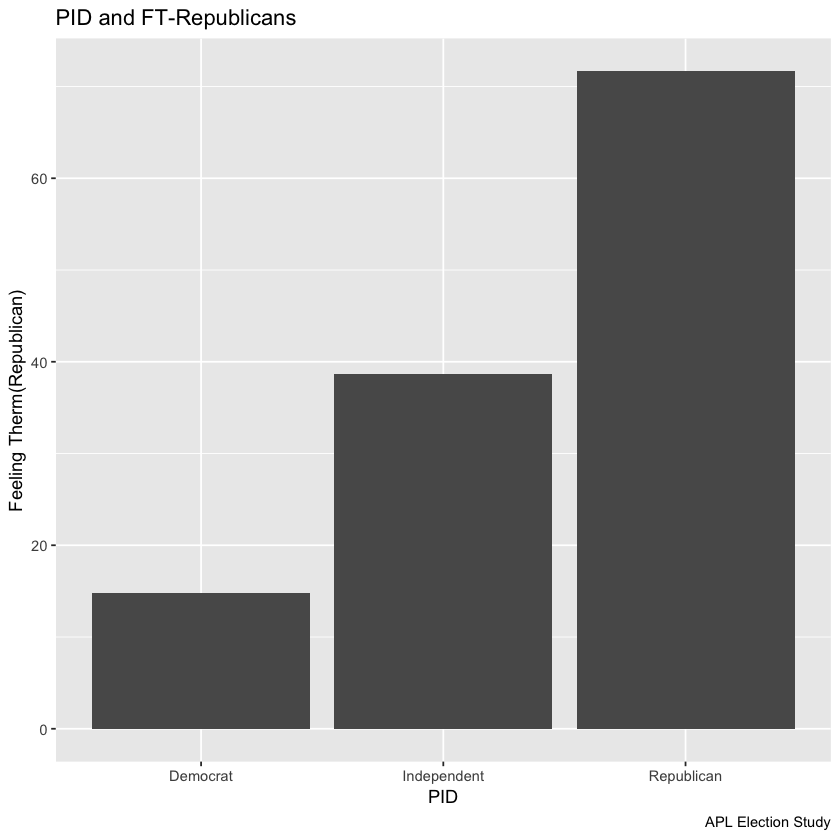

In [102]:
### let's do a linear regression
lm(rep_ft~as.factor(pid3), clean_data) %>% summary()
model<-lm(rep_ft~as.factor(pid3)+as.factor(pid3), clean_data)
print("The FT score for Dems :")
coef(model) %*% c(1, 0, 0)   ### Mean for Dem
print("The FT score for Independent :")
coef(model) %*% c(1, 1, 0)   ### I
print("The FT score for Reps :")
coef(model) %*% c(1, 0, 1)  ### Rep

### Now let's simulate uncertainty
data_matrix<-data.frame(scores=
             c(coef(model) %*% c(1, 0, 0),
               coef(model) %*% c(1, 1, 0) ,
               coef(model) %*% c(1, 0, 1)),
             PID=c("Democrat", "Independent", "Republican"))

data_matrix


ggplot(data=data_matrix, aes(x=as.factor(PID), y=scores)) +
  geom_bar(stat="identity") +
  labs(title="PID and FT-Republicans",
       caption="APL Election Study")+
   xlab("PID")+
   ylab("Feeling Therm(Republican)")



